**LIFE EXPECTANCY**

In [207]:
# Loading required modules
import pandas as pd
import numpy as np
import re
import statistics as st
import io
from matplotlib import pyplot as plt
from scipy.stats import norm, chisquare
import seaborn as sns
from sklearn.preprocessing import normalize;
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from google.colab import files 
uploaded = files.upload()

Saving sds.csv to sds (6).csv


**EXPLORATORY DATA ANALYSIS**

In [208]:
# Reading the csv file into a pandas dataframe object df
df = pd.read_csv("sds.csv")

#basic operations
df.head()


,Country,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0


In [209]:
# Look for number of rows and columns in the dataet
df.shape

(2938, 15)

In [210]:
# Datatype of each column
df.dtypes

Country                    object
Year                        int64
Life_expectancy           float64
Adult_Mortality           float64
infant_deaths               int64
Alcohol                   float64
percentage_expenditure    float64
Hepatitis_B               float64
Measles                     int64
BMI                       float64
Polio                     float64
Total_expenditure         float64
Diphtheria                float64
HIV/AIDS                  float64
Population                float64
dtype: object

In [211]:
# Basic Statistical constants of each column
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2919.000000,2712.00000,2919.000000,2938.000000,2.286000e+03
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,82.550188,5.93819,82.324084,1.742103,1.275338e+07
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,23.428046,2.49832,23.716912,5.077785,6.101210e+07
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.37000,2.000000,0.100000,3.400000e+01
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.26000,78.000000,0.100000,1.957932e+05
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.75500,93.000000,0.100000,1.386542e+06
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,97.000000,7.49250,97.000000,0.800000,7.420359e+06
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.60000,99.000000,50.600000,1.293859e+09


**REMOVAL OF UNWANTED OBSERVATION AND IMPLEMENTATION ON NULL VALUES**

In [212]:
#checking for the existence of null value
df.isnull().values.any()

True

In [213]:
#null values in each column
df.isnull().sum()


Country                     0
Year                        0
Life_expectancy            10
Adult_Mortality            10
infant_deaths               0
Alcohol                   194
percentage_expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
Polio                      19
Total_expenditure         226
Diphtheria                 19
HIV/AIDS                    0
Population                652
dtype: int64

In [214]:
# Filling the null values or removing them:
medianl=df['Life_expectancy '].median()
df['Life_expectancy ']=df['Life_expectancy '].fillna(medianl)
medianA=df['Adult_Mortality'].median()
df['Adult_Mortality']=df['Adult_Mortality'].fillna(medianA)
medianAL=df['Alcohol'].median()
df['Alcohol']=df['Alcohol'].fillna(medianAL)
medianH=df['Hepatitis_B'].median()
df['Hepatitis_B']=df['Hepatitis_B'].fillna(medianH)
medianB=df['BMI '].median()
df['BMI ']=df['BMI '].fillna(medianB)
medianP=df['Polio'].median()
df['Polio']=df['Polio'].fillna(medianP)
df['Total_expenditure']=df['Total_expenditure'].fillna(df['Total_expenditure'].median())
df['Diphtheria ']=df['Diphtheria '].fillna(df['Diphtheria '].median())
medianPO=df['Population'].median()
df['Population']=df['Population'].fillna(medianPO)
df1=df.dropna()
df1.isnull().sum()

Country                   0
Year                      0
Life_expectancy           0
Adult_Mortality           0
infant_deaths             0
Alcohol                   0
percentage_expenditure    0
Hepatitis_B               0
Measles                   0
BMI                       0
Polio                     0
Total_expenditure         0
Diphtheria                0
HIV/AIDS                  0
Population                0
dtype: int64

In [215]:
#droping duplicate rows (if present)
df2= df.drop_duplicates()

In [216]:
df2['Country']= df2['Country'].str.upper()

In [217]:
df2.describe()
#describing cleaned dataset

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,82.617767,5.924098,82.393125,1.742103,1.023085e+07
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,23.367166,2.400770,23.655562,5.077785,5.402242e+07
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,3.400000e+01
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,78.000000,4.370000,78.000000,0.100000,4.189172e+05
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.755000,93.000000,0.100000,1.386542e+06
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,97.000000,7.330000,97.000000,0.800000,4.584371e+06
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.600000,99.000000,50.600000,1.293859e+09


**GRAPHICAL ANALYSIS**



1.   **CATEGORICAL**


*   **BAR CHART**



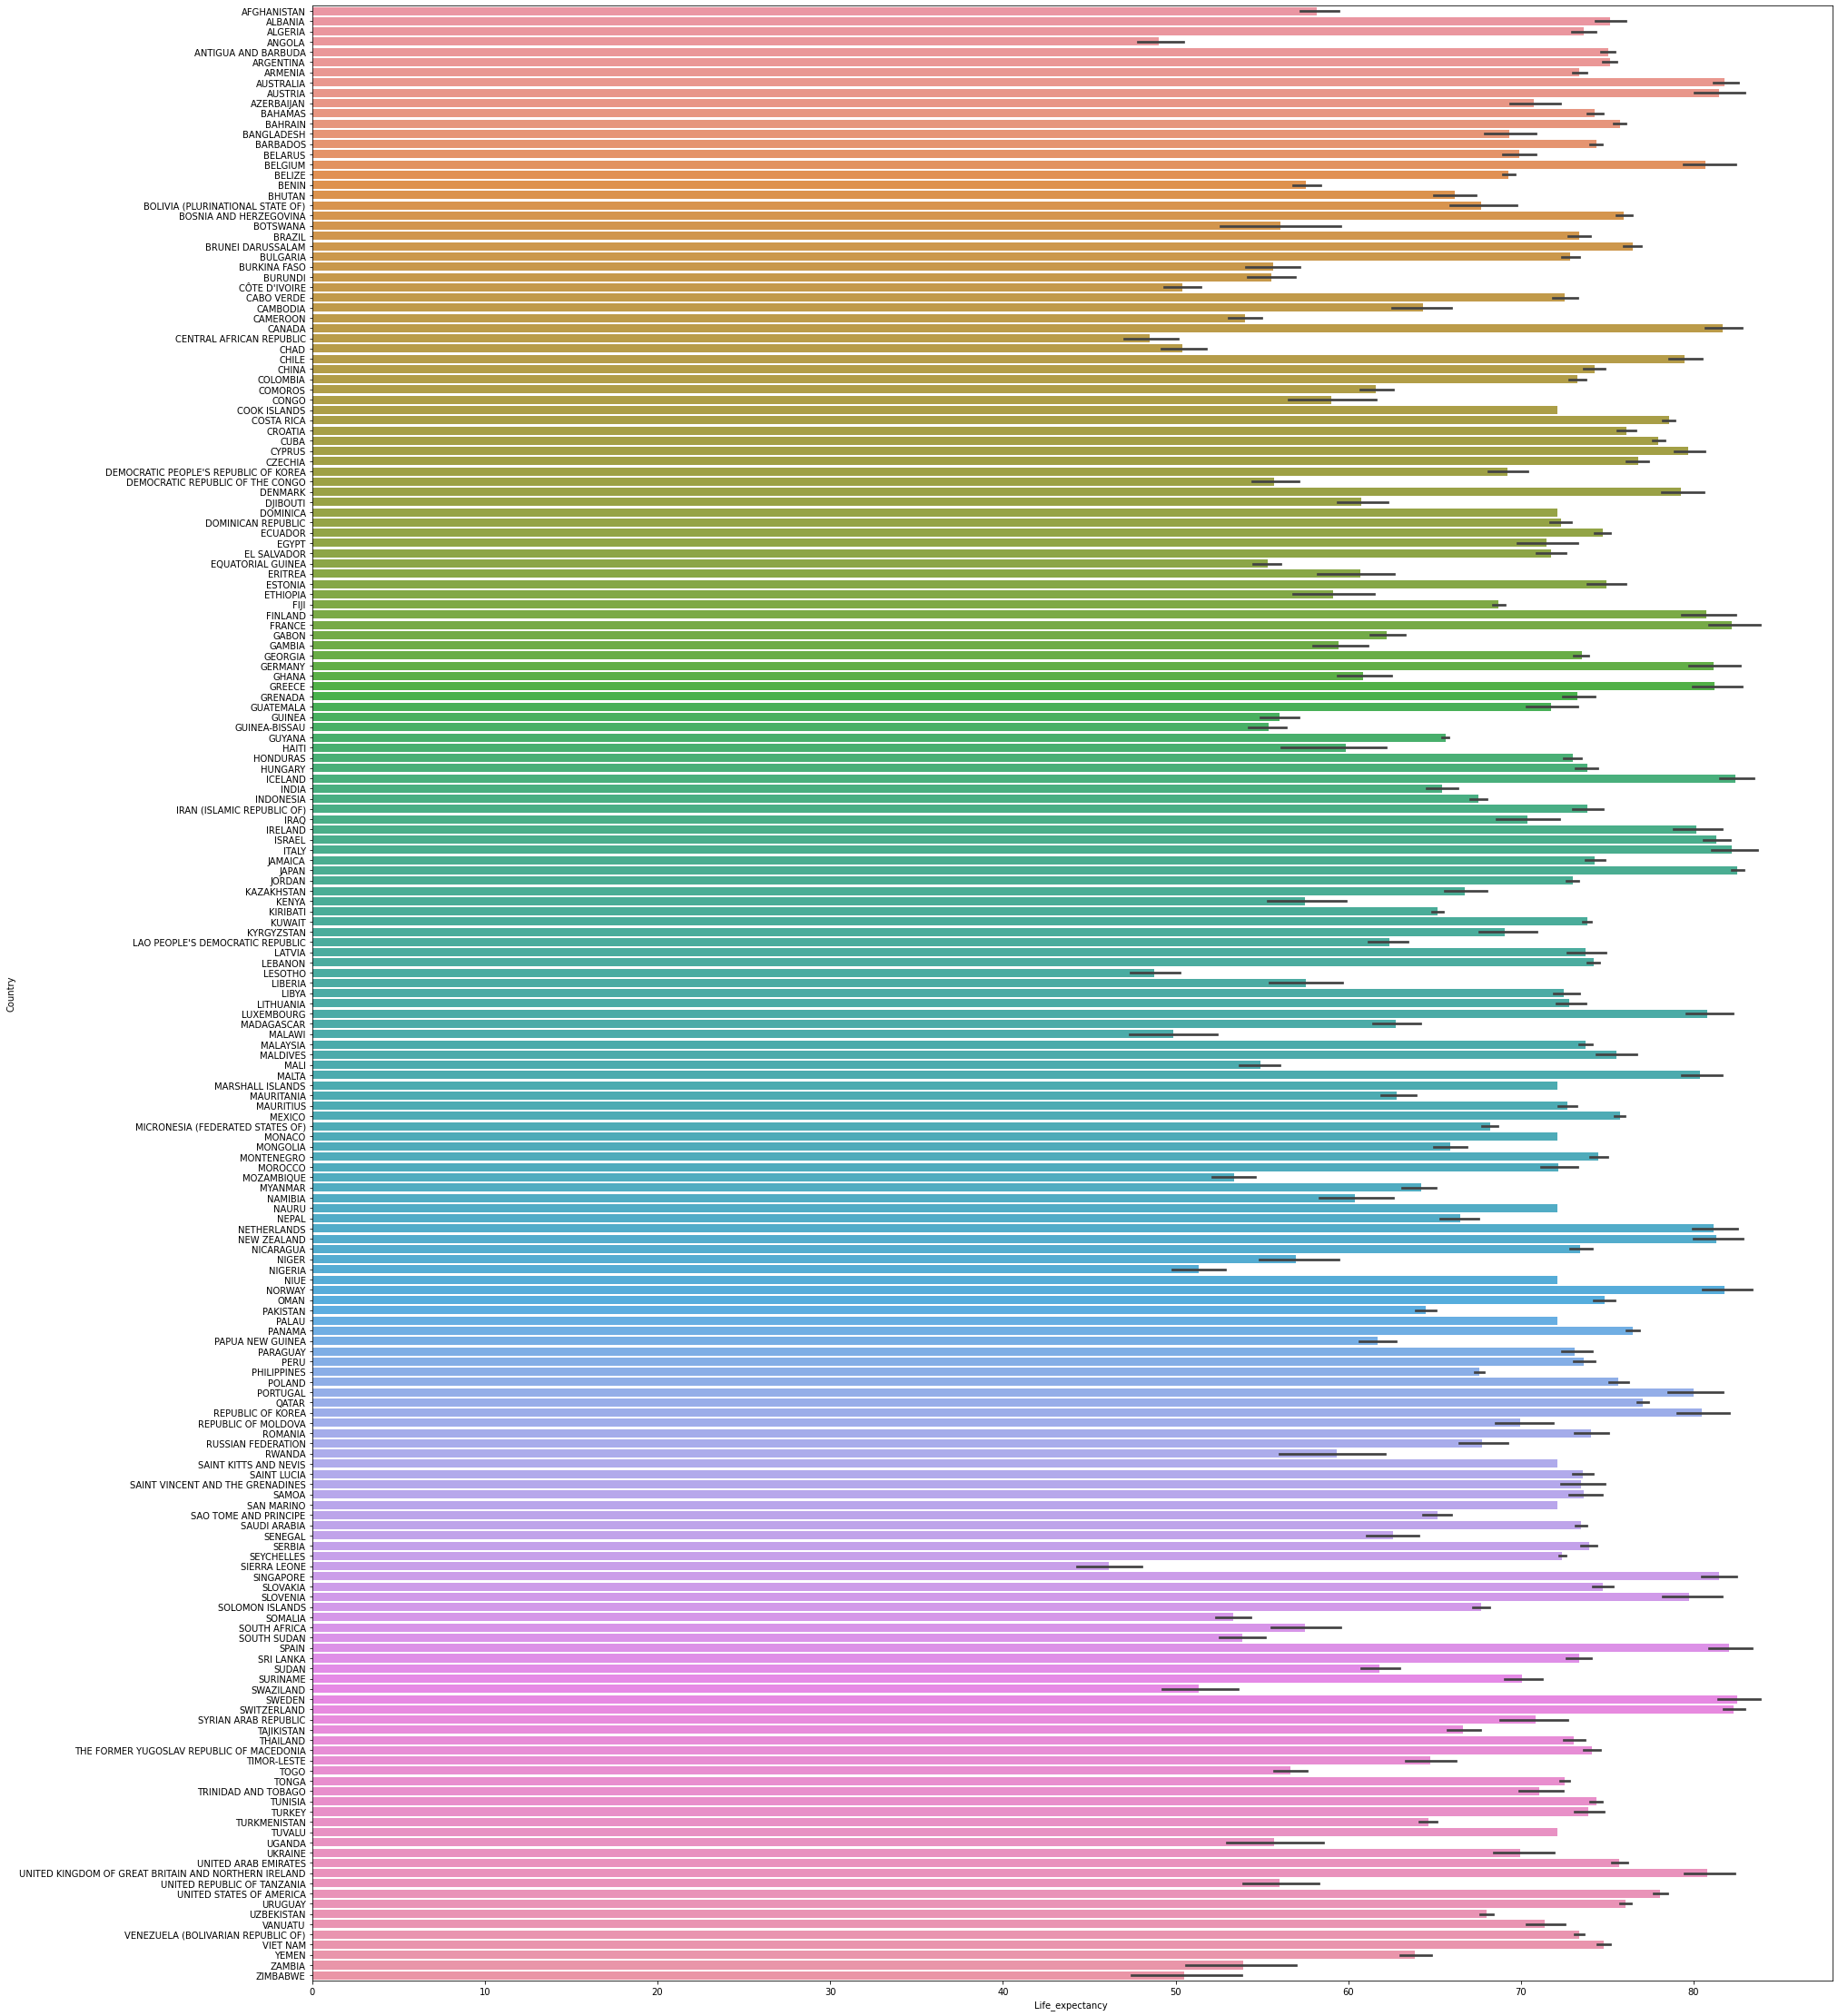

In [218]:
def plot_bar1(feature):
    plt.title(' country v/s life expecatncy')
    graph1 = sns.barplot(x=feature, y="Life_expectancy ", data=df2, palette='spring')
    graph1.set_xticklabels(graph1.get_xticklabels(),rotation=90,horizontalalignment='right')
   # plt.figure()
plt.rcParams['figure.figsize']=[30,40]
sns.barplot(x='Life_expectancy ', y='Country',data=df2)
#plt.rcParams['figure.figsize']=[30,50]

**REMOVING OUTLIERS USING IQR SCORES**



In [219]:
plt.rcParams['figure.figsize']=[5,5]
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR) 
s_d = df2.skew()
print(s_d)
df_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

Year                      8.000000e+00
Life_expectancy           1.240000e+01
Adult_Mortality           1.530000e+02
infant_deaths             2.200000e+01
Alcohol                   6.297500e+00
percentage_expenditure    4.368488e+02
Hepatitis_B               1.400000e+01
Measles                   3.602500e+02
BMI                       3.670000e+01
Polio                     1.900000e+01
Total_expenditure         2.960000e+00
Diphtheria                1.900000e+01
HIV/AIDS                  7.000000e-01
Population                4.165454e+06
dtype: float64
Year                      -0.006409
Life_expectancy           -0.642391
Adult_Mortality            1.177899
infant_deaths              9.786963
Alcohol                    0.649578
percentage_expenditure     4.652051
Hepatitis_B               -2.281697
Measles                    9.441332
BMI                       -0.229157
Polio                     -2.108909
Total_expenditure          0.661108
Diphtheria                -2.083566
HIV/AID

2. **NUMERICAL**

*   **HISTOGRAM**






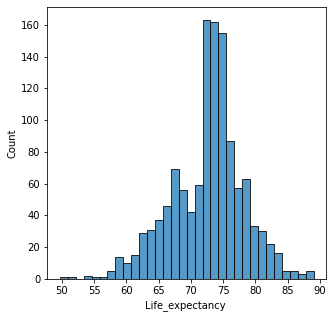

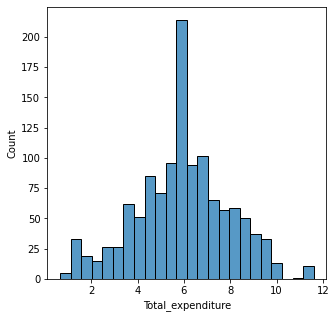

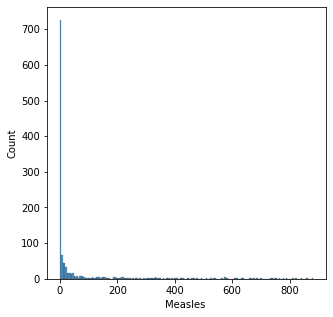

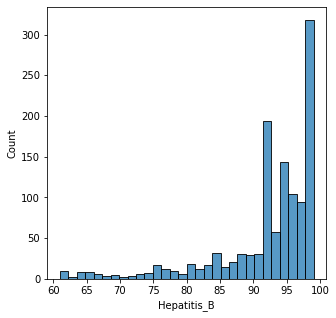

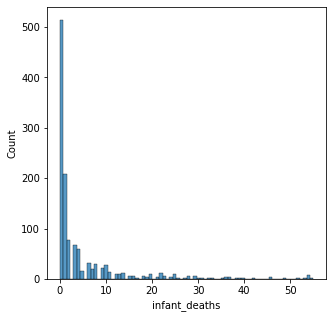

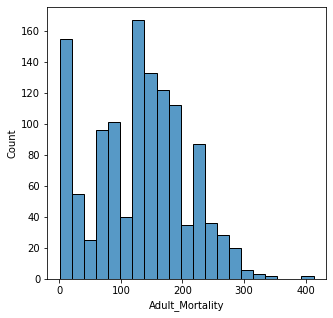

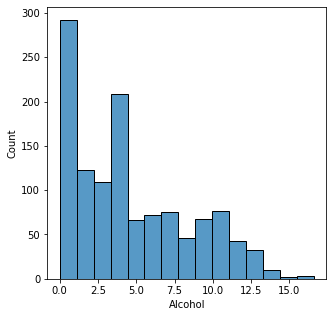

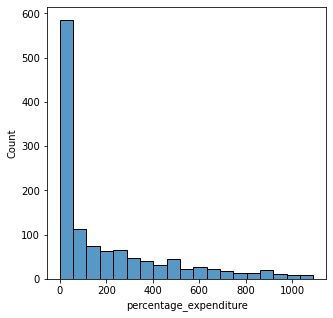

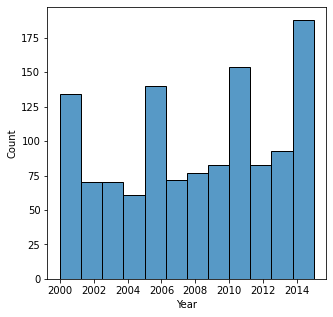

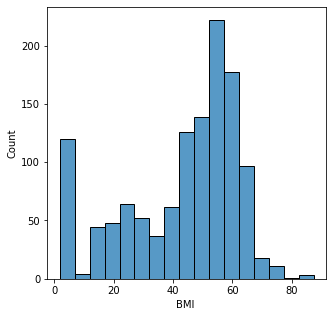

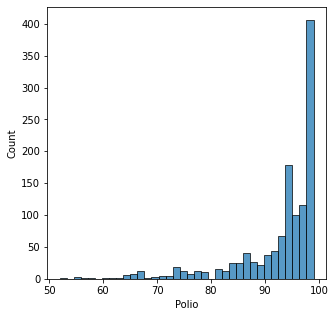

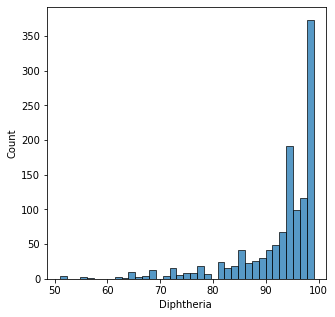

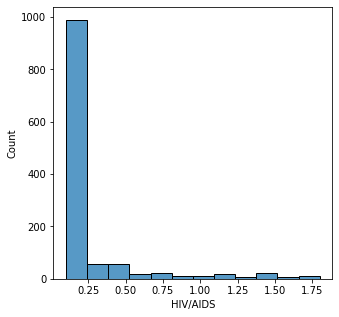

In [220]:
plt.rcParams['figure.figsize']=[5,5]
sns.histplot(df_out['Life_expectancy '] )
plt.show()
sns.histplot(df_out['Total_expenditure'] )
plt.show()
sns.histplot(df_out['Measles '] )
plt.show()
sns.histplot(df_out['Hepatitis_B'] )
plt.show()
sns.histplot(df_out['infant_deaths'] )
plt.show()
sns.histplot(df_out['Adult_Mortality'] )
plt.show()
sns.histplot(df_out['Alcohol'] )
plt.show()
sns.histplot(df_out['percentage_expenditure'] )
plt.show()
sns.histplot(df_out['Year'] )
plt.show()
sns.histplot(df_out['BMI '] )
plt.show()
sns.histplot(df_out['Polio'] )
plt.show()
sns.histplot(df_out['Diphtheria '] )
plt.show()
sns.histplot(df_out['HIV/AIDS'] )
plt.show()



*   **BOX PLOTS**



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


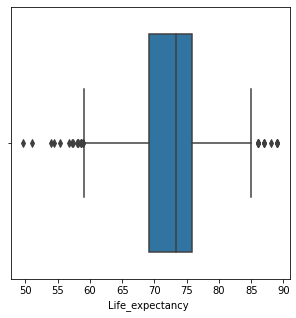

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


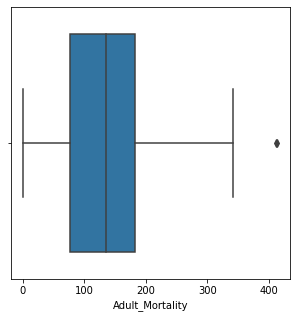

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


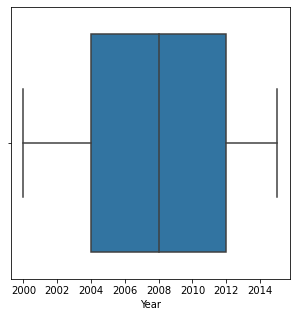

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


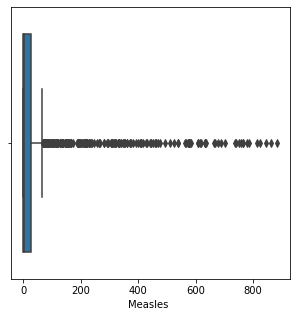

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


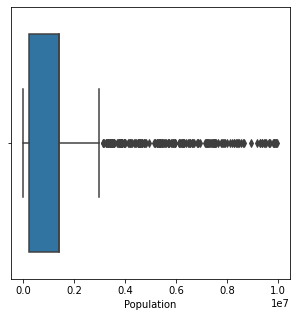

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


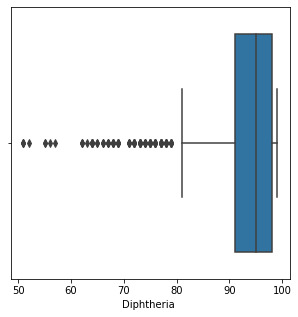

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


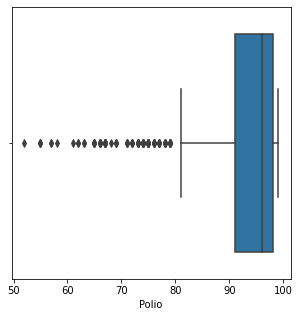

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


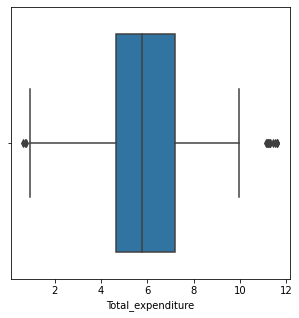

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


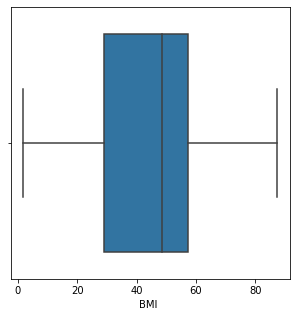

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


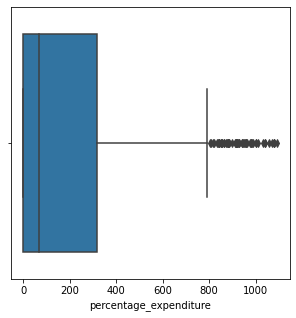

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


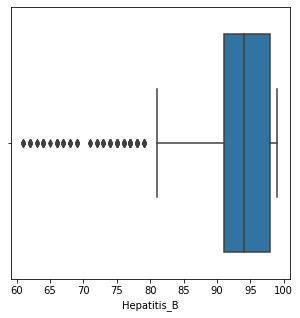

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


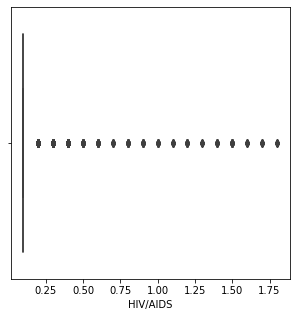

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


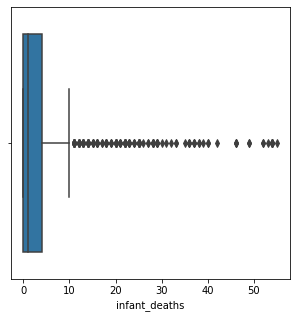

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


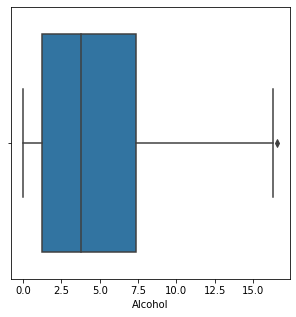

In [221]:
sns.boxplot(df_out['Life_expectancy '])
plt.show()
sns.boxplot(df_out['Adult_Mortality'])
plt.show()
sns.boxplot(df_out['Year'])
plt.show()
sns.boxplot(df_out['Measles '])
plt.show()
sns.boxplot(df_out['Population'])
plt.show()
sns.boxplot(df_out['Diphtheria '])
plt.show()
sns.boxplot(df_out['Polio'])
plt.show()
sns.boxplot(df_out['Total_expenditure'])
plt.show()
sns.boxplot(df_out['BMI '])
plt.show()
sns.boxplot(df_out['percentage_expenditure'])
plt.show()
sns.boxplot(df_out['Hepatitis_B'])
plt.show()
sns.boxplot(df_out['HIV/AIDS'])
plt.show()
sns.boxplot(df_out['infant_deaths'])
plt.show()
sns.boxplot(df_out['Alcohol'])
plt.show()

**NORMALIZATIONS AND STANDARDIZATIONS**

In [222]:
df_out.dtypes

Country                    object
Year                        int64
Life_expectancy           float64
Adult_Mortality           float64
infant_deaths               int64
Alcohol                   float64
percentage_expenditure    float64
Hepatitis_B               float64
Measles                     int64
BMI                       float64
Polio                     float64
Total_expenditure         float64
Diphtheria                float64
HIV/AIDS                  float64
Population                float64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


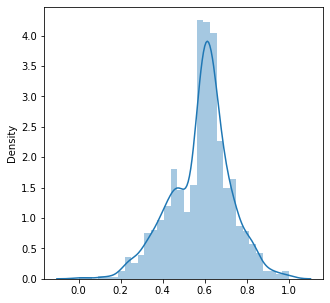

Mean:  0.582771979020616
Std:  0.14275613886153177


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


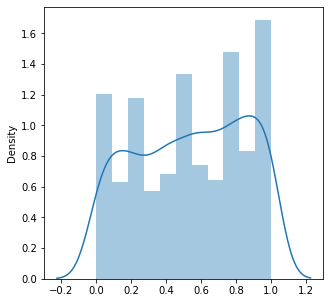

Mean:  0.5373061224489689
Std:  0.3108945460452793


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


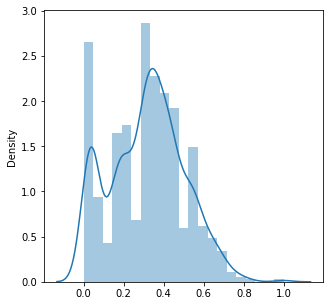

Mean:  0.3164909847434119
Std:  0.18357766550052632


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


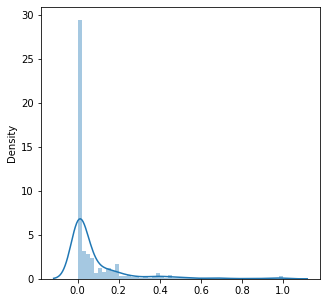

Mean:  0.08319109461966605
Std:  0.16163214196191242


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


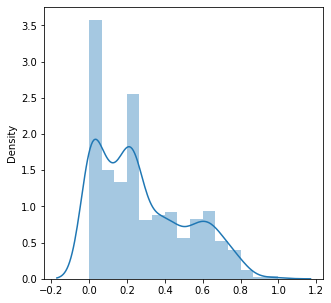

Mean:  0.27630559284667405
Std:  0.23400048860715622


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


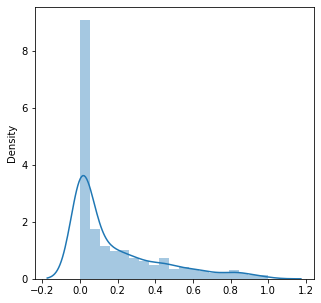

Mean:  0.18147201615485561
Std:  0.23946056453004183


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


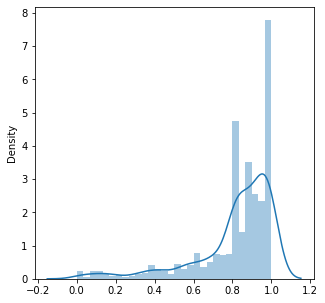

Mean:  0.8159398496240602
Std:  0.20907253148449534


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


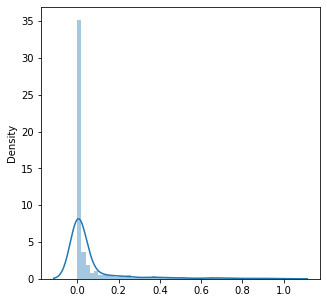

Mean:  0.06375297570896989
Std:  0.15852040104712659


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


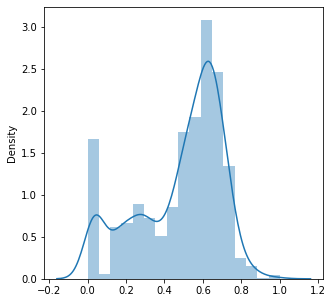

Mean:  0.4825703770969746
Std:  0.22014655748381026


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


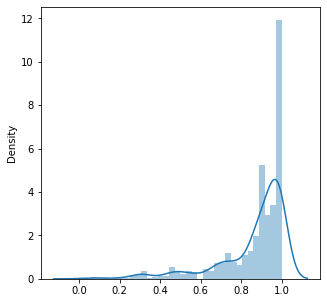

Mean:  0.8643334780720798
Std:  0.1757895723086635


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


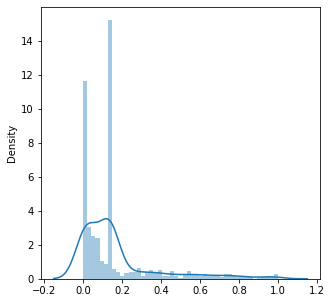

Mean:  0.16504751526677178
Std:  0.20754344660596913


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


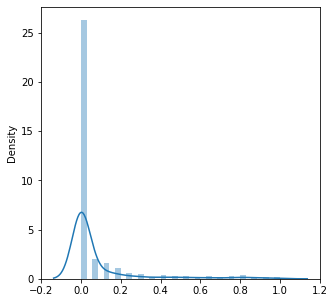

Mean:  0.07673469387755102
Std:  0.19039446900331175


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


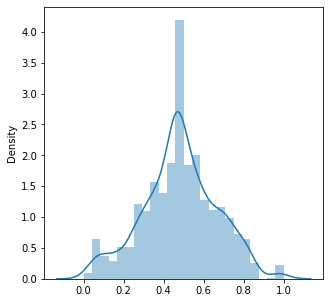

Mean:  0.4808159537787718
Std:  0.18472627121233234


array([[0.48858447],
       [0.47762557],
       [0.45753425],
       ...,
       [0.42648402],
       [0.40821918],
       [0.38995434]])

In [223]:
def normalize_2(data):
  from sklearn.preprocessing import MinMaxScaler
  data = np.array(data)
  scaler = MinMaxScaler();
  scaled = scaler.fit_transform(data.reshape(-1,1))
  sns.distplot(scaled)
  plt.show()
  print("Mean: ", scaled.mean())
  print("Std: ", scaled.std())
  return scaled
normalize_2(df_out['Life_expectancy '])
normalize_2(df_out['Year'])
normalize_2(df_out['Adult_Mortality'])
normalize_2(df_out['infant_deaths'])
normalize_2(df_out['Alcohol'])
normalize_2(df_out['percentage_expenditure'])
normalize_2(df_out['Hepatitis_B'])
normalize_2(df_out['Measles '])
normalize_2(df_out['BMI '])
normalize_2(df_out['Polio'])
normalize_2(df_out['Population'])
normalize_2(df_out['HIV/AIDS'])
normalize_2(df_out['Total_expenditure'])

In [224]:
# Normalize numerical data
df_norm = df_out.copy()
num_cols = ['Year','Life_expectancy ','Adult_Mortality','infant_deaths','Alcohol','percentage_expenditure','Hepatitis_B','Measles ','BMI ','Polio','Total_expenditure','Diphtheria ','HIV/AIDS','Population']
for cols in num_cols:
  df_norm[cols] = (df_norm[cols] - df_norm[cols].min())/(df_norm[cols].max() - df_norm[cols].min()) 
df_norm.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,0.537306,0.582772,0.316491,0.083191,0.276306,0.181472,0.815940,0.063753,0.482570,0.864333,0.480816,0.863316,0.076735,0.165048
std,0.311022,0.142814,0.183653,0.161698,0.234096,0.239558,0.209158,0.158585,0.220236,0.175861,0.184802,0.172461,0.190472,0.207628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.493639,0.182039,0.000000,0.074231,0.000000,0.789474,0.000000,0.317330,0.829787,0.367123,0.833333,0.000000,0.023435
50%,0.533333,0.600509,0.327670,0.018182,0.226011,0.063055,0.868421,0.001133,0.548009,0.936170,0.466210,0.916667,0.000000,0.139044
75%,0.800000,0.664122,0.441748,0.072727,0.442969,0.291699,0.973684,0.029445,0.647541,0.978723,0.598174,0.979167,0.000000,0.139044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [225]:
# Standardize numerical data
df_std = df_out.copy()
for cols in num_cols:
    df_std[cols] = (df_std[cols] - df_std[cols].mean())/(df_std[cols].std())  
df_std.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population
count,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03,1.225000e+03
mean,1.461543e-14,9.003048e-15,1.854299e-16,-2.352767e-16,-6.072965e-15,-3.210131e-16,-6.298816e-16,7.520515e-16,1.177697e-15,4.221566e-16,-1.820358e-15,-5.999736e-17,7.594832e-16,1.639052e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.727553e+00,-4.080624e+00,-1.723313e+00,-5.144839e-01,-1.180309e+00,-7.575274e-01,-3.901071e+00,-4.020110e-01,-2.191147e+00,-4.914857e+00,-2.601794e+00,-5.005859e+00,-4.028655e-01,-7.949185e-01
25%,-8.701631e-01,-6.241197e-01,-7.321003e-01,-5.144839e-01,-8.632143e-01,-7.575274e-01,-1.265368e-01,-4.020110e-01,-7.502852e-01,-1.964402e-01,-6.152143e-01,-1.738536e-01,-4.028655e-01,-6.820503e-01
50%,-1.277336e-02,1.241956e-01,6.086990e-02,-4.020409e-01,-2.148465e-01,-4.943124e-01,2.509166e-01,-3.948697e-01,2.971306e-01,4.084850e-01,-7.903557e-02,3.093469e-01,-4.028655e-01,-1.252389e-01
75%,8.446164e-01,5.696214e-01,6.820299e-01,-6.471207e-02,7.119455e-01,4.601259e-01,7.541878e-01,-2.163374e-01,7.490613e-01,6.504551e-01,6.350458e-01,6.717473e-01,-4.028655e-01,-1.252389e-01
max,1.487659e+00,2.921469e+00,3.721749e+00,5.669879e+00,3.091442e+00,3.416821e+00,8.800056e-01,5.903750e+00,2.349428e+00,7.714402e-01,2.809411e+00,7.925475e-01,4.847244e+00,4.021383e+00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


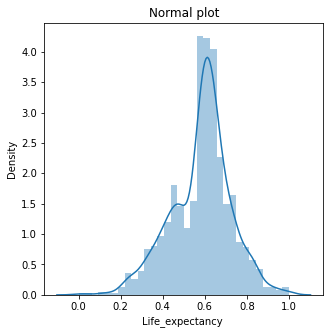

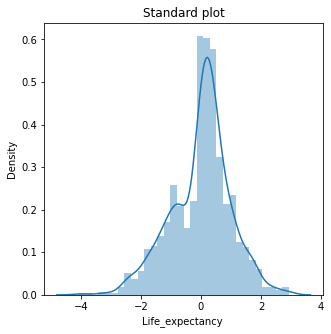

In [226]:
# plots to prove normality
sns.distplot(df_norm['Life_expectancy '],kde=True)
plt.title("Normal plot")
plt.figure()
plt.title("Standard plot")
sns.distplot(df_std['Life_expectancy '],kde=True)

**HYPOTHESIS TESTING**

In [238]:
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df_out['Life_expectancy '], alternative ="larger", value=69) 
# alternative = larger indicates one tailed test. larger indicates µ>6500 in alternate hypothesis
print("p = ",float(pval))
if pval < 0.05:
    print("Reject Null hypothesis")
else:
    print("Accept Null hypothesis")

p =  4.288213589898631e-112
Reject Null hypothesis


**CORRELATION**


  *   **1 indicates perfect positive correlation**
  *   **-1 indicates perfect negative correlation**
  *   **0 indicates no relation**





In [239]:
t=df_out.corr()
t

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population
Year,1.000000,0.091918,-0.069731,0.081718,-0.141791,-0.056290,0.043066,0.030246,0.008401,0.017087,0.010374,0.062828,0.001881,0.066619
Life_expectancy,0.091918,1.000000,-0.591982,-0.348761,0.379266,0.272857,0.229047,-0.078149,0.357907,0.344669,0.250327,0.364258,-0.487428,0.061444
Adult_Mortality,-0.069731,-0.591982,1.000000,0.225449,-0.113907,-0.184910,-0.163773,0.035215,-0.266615,-0.188310,-0.125355,-0.197903,0.349402,0.004910
infant_deaths,0.081718,-0.348761,0.225449,1.000000,-0.267364,-0.164754,-0.177454,0.322787,-0.165444,-0.208257,-0.034580,-0.221132,0.218152,0.031331
Alcohol,-0.141791,0.379266,-0.113907,-0.267364,1.000000,0.132689,0.138341,-0.116092,0.214481,0.211179,0.319744,0.228124,-0.166044,0.073470
percentage_expenditure,-0.056290,0.272857,-0.184910,-0.164754,0.132689,1.000000,0.049857,-0.047062,0.142145,0.077557,0.099834,0.101010,-0.138009,0.081099
Hepatitis_B,0.043066,0.229047,-0.163773,-0.177454,0.138341,0.049857,1.000000,-0.053969,0.049783,0.747506,0.043038,0.751992,-0.200889,-0.033638
Measles,0.030246,-0.078149,0.035215,0.322787,-0.116092,-0.047062,-0.053969,1.000000,-0.080291,-0.086173,-0.051560,-0.076737,0.052812,-0.019406
BMI,0.008401,0.357907,-0.266615,-0.165444,0.214481,0.142145,0.049783,-0.080291,1.000000,0.105301,0.166158,0.122104,-0.274231,0.095919
Polio,0.017087,0.344669,-0.188310,-0.208257,0.211179,0.077557,0.747506,-0.086173,0.105301,1.000000,0.110398,0.926721,-0.245418,0.010651
